## Работа с файлами конфигурации

Документация на [ConfigParser](https://docs.python.org/3/library/configparser.html).

In [4]:
import configparser

In [5]:
config = configparser.ConfigParser()
config["DEFAULT"] = {
    "ServerAliveInterval": "45",
    "Compression": "yes",
    "CompressionLevel": "9",
}
config["bitbucket.org"] = {}
config["bitbucket.org"]["User"] = "hg"
config["topsecret.server.com"] = {}
topsecret = config["topsecret.server.com"]
topsecret["Port"] = "50022"
topsecret["Port2"] = "500221"
topsecret["ForwardX11"] = "no"
config["DEFAULT"]["ForwardX11"] = "yes"
with open("data/example.ini", "w") as configfile:
    config.write(configfile)

In [6]:
%cat data/example.ini
# ! rm data/example.ini

[DEFAULT]
serveraliveinterval = 45
compression = yes
compressionlevel = 9
forwardx11 = yes

[bitbucket.org]
user = hg

[topsecret.server.com]
port = 50022
port2 = 500221
forwardx11 = no



In [7]:
config = configparser.ConfigParser()
config.read('data/example.ini')
print("Sections:", config.sections())
print("If 'bitbucket.org' section is here:", 'bitbucket.org' in config)
print("If 'bitbucket.com' section is here:", 'bitbucket.com' in config)
print("bitbucket.org - User value:", config['bitbucket.org']['User'])
print("DEFAULT - Compression value:", config['DEFAULT']['Compression'])
topsecret = config['topsecret.server.com']
print("topsecret.server.com - ForwardX11", topsecret['ForwardX11'])
print("bitbucket.org keys and values")
for key in config['bitbucket.org']:
    print(f"    {key:20}: {config['bitbucket.org'][key]}")


Sections: ['bitbucket.org', 'topsecret.server.com']
If 'bitbucket.org' section is here: True
If 'bitbucket.com' section is here: False
bitbucket.org - User value: hg
DEFAULT - Compression value: yes
topsecret.server.com - ForwardX11 no
bitbucket.org keys and values
    user                : hg
    serveraliveinterval : 45
    compression         : yes
    compressionlevel    : 9
    forwardx11          : yes


In [8]:
config = configparser.ConfigParser()

#config.add_section("DEFAULT")
config.set("DEFAULT", "serveraliveinterval", "55")
config.set("DEFAULT", "compression", "yes")
config.set("DEFAULT", "compressionlevel", "9")
config.set("DEFAULT", "forwardx11", "yes")
config.add_section("bitbucket.org")
config.set("bitbucket.org", "user", "hg")
config.add_section("topsecret.server.com")
config.set("topsecret.server.com", "port", "500221")
config.set("topsecret.server.com", "forwardx11", "no")

with open("data/example.ini", "w") as config_file:
    config.write(config_file)
    
print("getting values: ", config.get("DEFAULT", "compression"),
      config.get("topsecret.server.com", "port"))

getting values:  yes 500221


In [9]:
%cat data/example.ini

[DEFAULT]
serveraliveinterval = 55
compression = yes
compressionlevel = 9
forwardx11 = yes

[bitbucket.org]
user = hg

[topsecret.server.com]
port = 500221
forwardx11 = no



Все значения должны иметь строковый тип.

In [10]:
config.set("DEFAULT", "serveraliveinterval", 55)

TypeError: option values must be strings

Секция DEFAULT должна указываться явно.

In [11]:
config.set("serveraliveinterval", "55")


TypeError: option values must be strings

Секция DEFAULT должна указываться явно даже при чтении.

In [12]:
config.get("serveraliveinterval", "55")


NoSectionError: No section: 'serveraliveinterval'

Вложенные секции разрешены.

Секции и значения можно удалять.

В документации указано ещё много разных возможностей для работы.

In [13]:
config.remove_option("DEFAULT", "serveraliveinterval")

True

# YAML

https://pyyaml.org/wiki/PyYAMLDocumentation



In [14]:
import yaml

In [15]:
config = dict()
config["DEFAULT"] = {
    "ServerAliveInterval": "45",
    "Compression": "yes",
    "CompressionLevel": "9",
}
config["bitbucket.org"] = {}
config["bitbucket.org"]["User"] = "hg"
config["topsecret.server.com"] = {}
topsecret = config["topsecret.server.com"]
topsecret["Ports"] = ["50022", "500221"]
topsecret["ForwardX11"] = "no"
config["DEFAULT"]["ForwardX11"] = "yes"
with open("data/example.yaml", "w") as configfile:
    yaml.dump(config, configfile)

In [16]:
with open("data/example.yaml", "r") as configfile:
    config2 = yaml.load(configfile, yaml.CLoader)
config2

{'DEFAULT': {'Compression': 'yes',
  'CompressionLevel': '9',
  'ForwardX11': 'yes',
  'ServerAliveInterval': '45'},
 'bitbucket.org': {'User': 'hg'},
 'topsecret.server.com': {'ForwardX11': 'no', 'Ports': ['50022', '500221']}}

Пару примеров из документации.

In [17]:
yaml.load("""
    none: [~, null]
    bool: [true, false, on, off]
    int: 42
    float: 3.14159
    list: [LITE, RES_ACID, SUS_DEXT]
    dict: {hp: 13, sp: 5}""", 
    yaml.CLoader)

{'none': [None, None],
 'bool': [True, False, True, False],
 'int': 42,
 'float': 3.14159,
 'list': ['LITE', 'RES_ACID', 'SUS_DEXT'],
 'dict': {'hp': 13, 'sp': 5}}

In [18]:
class Hero:
    def __init__(self, name, hp, sp):
        self.name = name
        self.hp = hp
        self.sp = sp
        
    def __repr__(self):
        return "%s(name=%r, hp=%r, sp=%r)" % (
            self.__class__.__name__, self.name, self.hp, self.sp)


h = Hero("Nice Trooper", 1423, 100)
yaml.dump(h)

'!!python/object:__main__.Hero\nhp: 1423\nname: Nice Trooper\nsp: 100\n'

In [19]:
yaml.safe_load("!!python/object:__main__.Hero\nhp: 1423\nname: Nice Trooper\nsp: 100\n")


ConstructorError: could not determine a constructor for the tag 'tag:yaml.org,2002:python/object:__main__.Hero'
  in "<unicode string>", line 1, column 1:
    !!python/object:__main__.Hero
    ^

# Pickle

In [20]:
import pickle

In [21]:
with open("data/example.pickle", "wb") as configfile:
    pickle.dump(config, configfile)

In [22]:
with open("data/example.pickle", "rb") as configfile:
    config3 = pickle.load(configfile)
    
config3

{'DEFAULT': {'ServerAliveInterval': '45',
  'Compression': 'yes',
  'CompressionLevel': '9',
  'ForwardX11': 'yes'},
 'bitbucket.org': {'User': 'hg'},
 'topsecret.server.com': {'Ports': ['50022', '500221'], 'ForwardX11': 'no'}}

## Ведение журнала (логов) средствами Python

В библиотеке [logging](https://docs.python.org/3/library/logging.html) существует пять последовательных уровней логирования: DEBUG, INFO, WARNING, ERROR и CRITICAL. При создании журнала можно задать, начиная с какого уровля сообщения будут сохраняться в файл.

Как всегда - всё самое вкусное на [Хабре](https://habr.com/ru/post/513966/).

In [23]:
! rm data/sample.log

rm: невозможно удалить 'data/sample.log': Нет такого файла или каталога


In [24]:
import logging

In [25]:
# add filemode="w" to overwrite
logging.basicConfig(filename="data/sample.log", filemode="w", level=logging.ERROR)
 
logging.debug("This is a debug message")
logging.info("Informational message")
logging.error("An error has happened!")

Ниже видно, что сообщения ниже уровня INFO, установленного при создании объекта, не выводятся.

In [26]:
%cat data/sample.log
#!touch sample.log

ERROR:root:An error has happened!


Можно заводить логи для отдельных модулей, потоков и пр., причем в выдаче будет указываться, что это за поток.

In [27]:
logger_main = logging.getLogger(__name__)
logger_main.error("Something 1")

logger_ex = logging.getLogger("ex")
logger_ex.setLevel(logging.WARNING)
logger_ex.error("Something 2")

In [28]:
%cat data/sample.log
#!touch sample.log

ERROR:root:An error has happened!
ERROR:__main__:Something 1
ERROR:ex:Something 2


Можно задать формат выдачи для логов.

In [29]:
log_format = "%(asctime)s - [%(levelname)s] - %(name)s - (%(filename)s).%(funcName)s(%(lineno)d) - %(message)s"

logging.root.handlers[0].setFormatter(logging.Formatter(log_format))

In [30]:
logger_main.info("Test format 1")

logger_ex.error("Test format 2")

In [31]:
%cat data/sample.log
#!touch sample.log

ERROR:root:An error has happened!
ERROR:__main__:Something 1
ERROR:ex:Something 2
2025-09-10 17:16:15,099 - [ERROR] - ex - (1091495885.py).<module>(3) - Test format 2


Можно закрыть поток с логами.

In [32]:
logging.root.handlers[0].close()

## Логирование в формате docx

При проведении экспериментов очень удобно сохранять их результаты в формате документов. Если автоматизировать этот процесс, можно гарантировать, что результаты не пропадут, а заодно и будет понятно на каких параметрах запускался эксперимент.

В случае, если нам необходимо создавать журнал по шаблону, можно использовать библиотеку `docxtpl`. Для нее необходимо создать документ-шаблон, в котором указать в какое место будут добавляться определенные данные. Ниже приведен пример такого документа (это содержимое файла `data/template.docx`.
```
Первый текст: {{text1}}

Второй текст: {{text2}}

Косинусная мера сходства: {{cos_sim}}
```

В двойных фигурных скобках обозначаются названия параметров, которые необходимо подставить.

Дальше библиотеке необходимо передать словарь, в котором ключами являются названия параметров, а значения должны быть подставлены в шаблон.

In [35]:
# Позволяет работать с такими шаблонами.
from docxtpl import DocxTemplate
# Превращает числа в слова.
from num2words import num2words

In [36]:
import datetime
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
# Данные для сравнения
with open("data/sebastopol.txt", "rt") as infile:
    text = infile.readlines()

t1 = text[10]
t2 = text[12]
v1 = CountVectorizer().fit_transform([t1, t2])

# Открываем шаблон.
doc = DocxTemplate("data/template.docx")
# Формируем словарь с названиями параметров и значениями.
context = {'text1' : t1, 
           'text2' : t2, 
           'cos_sim': cosine_similarity(v1[0], v1[1]),
           'date': datetime.datetime.now().strftime("%Y-%m-%d"),
           'time': datetime.datetime.now().strftime("%H:%M:%S")
          }
# Добавляем параметры в документ и сохраняем.
doc.render(context)
doc.save(f"data/Протокол_1.docx")

Но иногда нам надо просто сформировать результаты в виде docx-файла. Для этого можно использовать библиотеку `docx`.

In [39]:
from docx import Document

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
def save_picture_in_document(data, document) -> None:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax = sns.heatmap(data=data, ax=ax)
    fig.savefig("tmp.png")
    p = document.add_paragraph()
    r = p.add_run()
    r.add_text(f'Some text')
    p = document.add_paragraph()
    r = p.add_run()
    r.add_text(f'data placed here')
    r.add_picture('tmp.png')
    
    
    table = document.add_table(rows=data.shape[0], cols=data.shape[1])
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            table.cell(i, j).text = str(data[i, j])


/tmp/ipykernel_730884/1667127612.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cosine_matrix[i][j] = cosine_similarity(vectors[i], vectors[j])


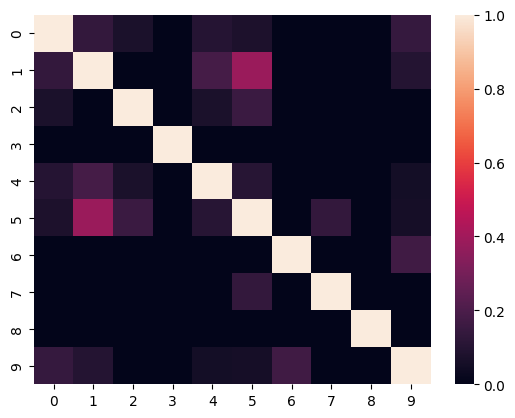

In [42]:
cosine_matrix = np.zeros((10, 10))
vectors = CountVectorizer().fit_transform([t for t in text[10:20]])

for i in range(10):
    for j in range(10):
        cosine_matrix[i][j] = cosine_similarity(vectors[i], vectors[j])
        
document = Document()
save_picture_in_document(cosine_matrix, document)
document.save('data/pictures_1.docx')

## Тестирование программ на Питоне

У Питона есть две встроенные возможности для проверки корректности выполнения программы. Первая из них - это оператор assert. Он проверяет истинность переданного выражения, и если оно ложно, останавливает выполнение программы.

In [43]:
assert 2==3, "That is the question"

AssertionError: That is the question

Однако такие проверки скорее походят на проверку корректного состояния программы, чем на тестирование. Тесты для тестирования пишутся и выполняются отдельно. В соответствии с методологией Agile, сперва пишутся тесты, а только потом код, который проверяется этими тестами.

Простейшим видом тестов являются модульные тесты, которые проверяют работу отдельных функций и модулей. Более сложными являются интеграционные тесты, проверяющие корректность взаимодействия модулей между собой. Здесь мы разберем инструментарий для модульного тестирования, однако в него могут быть внесены и интеграционные тесты.

#### Библиотека unittest

[Документация на unittest](https://docs.python.org/3/library/unittest.html).

Альтернатива - [doctest](https://docs.python.org/3/library/doctest.html#module-doctest), для которого тесты пишутся в строках документации к функциям. Но всё, что он может, это тестировать функции.

In [44]:
import unittest
# Just for fun.
from abc import abstractmethod
# Need for an example.
import sys

Тесты пишутся обязательно как класс, наследуемый от `unittest.TestCase`. Каждая функция этого класса будет отдельным тестом, все вместе они составят набор тестов.

Для вычисления результатов тестов используются функции, описанные в [документации](https://docs.python.org/3/library/unittest.html). В примере ниже используется простейшая - `assertEqual`.


|Method|Checks that|
|:-----------|:-------------|
|assertEqual(a, b)|a == b|
|assertNotEqual(a, b)|a != b|
|assertTrue(x)|bool(x) is True|
|assertFalse(x)|bool(x) is False|
|assertIs(a, b)|a is b|
|assertIsNot(a, b)|a is not b|
|assertIsNone(x)|x is None|
|assertIsNotNone(x)|x is not None|
|assertIn(a, b)|a in b|
|assertNotIn(a, b)|a not in b|
|assertIsInstance(a, b)|isinstance(a, b)|
|assertNotIsInstance(a, b)|not isinstance(a, b)|
|assertRaises(exc, fun, \*args, \*\*kwds)|fun(\*args, \*\*kwds) raises exc|
|assertRaisesRegex(exc, r, fun, \*args, \*\*kwds)|fun(\*args, \*\*kwds) raises exc and the message matches regex r|
|assertWarns(warn, fun, \*args, \*\*kwds)|fun(\*args, \*\*kwds) raises warn|
|assertWarnsRegex(warn, r, fun, \*args, \*\*kwds)|fun(\*args, \*\*kwds) raises warn and the message matches regex r|
|assertLogs(logger, level)|The with block logs on logger with minimum level|

In [45]:
class TestNotebook(unittest.TestCase):
    
    def test_add(self):
        a = 2 + 2
        self.assertEqual(a, 4)
        
    def test_mul(self):
        self.assertEqual(2*2, 4)


Вот так, увы, не работает. 

In [46]:
unittest.main()

E
ERROR: /home/edward/ (unittest.loader._FailedTest./home/edward/)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/home/edward/'

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (errors=1)


SystemExit: 1

/home/edward/.local/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Чтобы заработало, надо использовать некоторое волшебство.

In [47]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_add (__main__.TestNotebook.test_add) ... ok
test_mul (__main__.TestNotebook.test_mul) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.001s

OK


Тесты должны быть оформлены в виде функций, имя которых начинается с `test`, все остальные функции считаются сервисными.

In [48]:
class TestNotebook2(unittest.TestCase):
    
    def add2(self):
        self.assertEqual(2+2, 4)
        
    def mul2(self):
        self.assertEqual(2*2, 6)        

In [49]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_add (__main__.TestNotebook.test_add) ... ok
test_mul (__main__.TestNotebook.test_mul) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


Если создаются несколько классов, наследуемых от TestCase, они будут использованы все в порядке объявления.

In [50]:
class TestNotebook2(unittest.TestCase):
    
    def anyOther(self):
        some_code = 42
    
    def testAdd2(self):
        self.assertEqual(2+2, 4)
        
    def testMul2(self):
        self.assertEqual(2*2, 6)


In [51]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_add (__main__.TestNotebook.test_add) ... ok
test_mul (__main__.TestNotebook.test_mul) ... ok
testAdd2 (__main__.TestNotebook2.testAdd2) ... ok
testMul2 (__main__.TestNotebook2.testMul2) ... FAIL

FAIL: testMul2 (__main__.TestNotebook2.testMul2)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipykernel_730884/3904879068.py", line 10, in testMul2
    self.assertEqual(2*2, 6)
AssertionError: 4 != 6

----------------------------------------------------------------------
Ran 4 tests in 0.003s

FAILED (failures=1)


In [52]:
class TestNotebook3(unittest.TestCase):
    
    def testadd3(self):
        self.assertTrue(2+2==4)
        
    def testmul3(self):
        self.assertFalse(2*2==6)


In [53]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_add (__main__.TestNotebook.test_add) ... ok
test_mul (__main__.TestNotebook.test_mul) ... ok
testAdd2 (__main__.TestNotebook2.testAdd2) ... ok
testMul2 (__main__.TestNotebook2.testMul2) ... FAIL
testadd3 (__main__.TestNotebook3.testadd3) ... ok
testmul3 (__main__.TestNotebook3.testmul3) ... ok

FAIL: testMul2 (__main__.TestNotebook2.testMul2)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipykernel_730884/3904879068.py", line 10, in testMul2
    self.assertEqual(2*2, 6)
AssertionError: 4 != 6

----------------------------------------------------------------------
Ran 6 tests in 0.006s

FAILED (failures=1)


Опробуем некоторый пример, чуть более похожий на настоящий. Напишем класс, который будет формировать некоторое выражение в прямой польской записи.  
Базовый класс `Clause` будет хранить строку выражения и некий глобальный идентификатор, считающий выражения. Класс будет абстрактным.  
Класс `WordClause` будет хранить одно слово из выражения.  
Класс `ComplexClause` будет хранить список потомков и формировать из себя и них польскую запись.


In [54]:
class Clause:
    stringRepr = ''
    globalId = 0
    
    def __init__(self, _srepr):
        self.stringRepr = _srepr
        self.id = Clause.globalId + 1
        Clause.globalId += 1
    
    @abstractmethod
    def getStringRepr(self):
        pass
    

class WordClause(Clause):
    def getStringRepr(self):
        return self.stringRepr
    
class ComplexClause(Clause):
    def __init__(self, _srepr):
        Clause.__init__(self, _srepr)
        self.childs = []
    
    def getStringRepr(self):
        tstr = self.stringRepr + '['
        for c in self.childs:
            tstr += c.getStringRepr() + ','
        if len(self.childs) != 0:
            tstr = tstr[:-1]
        tstr += ']'
        return tstr
    
    def addClause(self, cla):
        self.childs.append(cla)

Протестируем корректность формирования таких выражений.

In [55]:
class ClauseTest(unittest.TestCase):
    # Функция с волшебным именем для инициализации переменных перед выполнением набора тестов.
    def setUp(self):
        print("setting up an object")
        self.cl1 = WordClause('123')
        self.cl2 = WordClause('234')
        self.cl3 = WordClause('345')
        self.cl4 = WordClause('456')
        self.ccl1 = ComplexClause('qwe')
        self.ccl2 = ComplexClause('asd')
        self.ccl3 = ComplexClause('zxc')

    # Функция с волшебным именем для инициализации класса.
    @classmethod
    def setUpClass(cls):
        print("setting up the class")
    
    # Функция с волшебным именем для очистки данных после успешного завершения тестов.
    def tearDown(self):
        print("tearing down")
        
    # Функция с волшебным именем для очистки данных в любом случае.
    def doCleanups(self):
        '''
    If setUp() fails, meaning that tearDown() is not called, then any cleanup functions added will still be called.
    addCleanup(function, /, *args, **kwargs)

    Add a function to be called after tearDown() to cleanup resources used during the test. Functions will be called in reverse order to the order they are added (LIFO). They are called with any arguments and keyword arguments passed into addCleanup() when they are added.
        '''
        print("cleaning up")

#     def shortDescription(self):
#         return "This is a testcase for word clauses."

    def testComplesClauseAddTest(self):
        '''test name in docstring'''
        print("start testing process 1")
        self.ccl1.addClause(self.cl1)
        self.assertEqual(len(self.ccl1.childs), 1)
        self.ccl1.addClause(self.cl2)
        self.assertEqual(len(self.ccl1.childs), 2)
        self.ccl2.addClause(self.cl3)
        self.ccl2.addClause(self.cl4)
        self.ccl3.addClause(self.ccl1)
        self.assertEqual(len(self.ccl3.childs), 1)
        self.ccl3.addClause(self.ccl2)
        self.assertEqual(len(self.ccl3.childs), 2)
        print("finish testing process 1")
        
    def testWordClauseStringReprTest(self):
        print("start testing process 2")
        self.assertEqual(self.cl1.getStringRepr(), '123')
        self.assertEqual(self.cl2.getStringRepr(), '234')
        self.assertEqual(self.ccl3.getStringRepr(), 'zxc[qwe[123,234],asd[345,456]]')
        print("finish testing process 2")
        # with self.subTest(i=i): - позволит проолжить тест.

    def testWordClauseStringReprTest2(self):
        print("start testing process 3")
        self.ccl1.addClause(self.cl1)
        self.ccl1.addClause(self.cl2)
        self.ccl2.addClause(self.cl3)
        self.ccl2.addClause(self.cl4)
        self.ccl3.addClause(self.ccl1)
        self.ccl3.addClause(self.ccl2)
        self.assertEqual(self.ccl3.getStringRepr(), 'zxc[qwe[123,234],asd[345,456]]')
        print("finish testing process 3")


In [56]:
unittest.main(argv=[''], verbosity=2, exit=False)

testComplesClauseAddTest (__main__.ClauseTest.testComplesClauseAddTest)
test name in docstring ... ok
testWordClauseStringReprTest (__main__.ClauseTest.testWordClauseStringReprTest) ... FAIL
testWordClauseStringReprTest2 (__main__.ClauseTest.testWordClauseStringReprTest2) ... ok
test_add (__main__.TestNotebook.test_add) ... ok
test_mul (__main__.TestNotebook.test_mul) ... ok
testAdd2 (__main__.TestNotebook2.testAdd2) ... ok
testMul2 (__main__.TestNotebook2.testMul2) ... FAIL
testadd3 (__main__.TestNotebook3.testadd3) ... ok
testmul3 (__main__.TestNotebook3.testmul3) ... ok

FAIL: testWordClauseStringReprTest (__main__.ClauseTest.testWordClauseStringReprTest)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipykernel_730884/1346343597.py", line 54, in testWordClauseStringReprTest
    self.assertEqual(self.ccl3.getStringRepr(), 'zxc[qwe[123,234],asd[345,456]]')
AssertionError: 'zxc[]' != 'zxc[qwe[123,234],asd[345,456]]

setting up the class
setting up an object
start testing process 1
finish testing process 1
tearing down
cleaning up
setting up an object
start testing process 2
tearing down
cleaning up
setting up an object
start testing process 3
finish testing process 3
tearing down
cleaning up


In [57]:
def external_resource_available():
    return False

class TestSkipTest(unittest.TestCase):
    @unittest.skip("demonstrating skipping")
    def test_nothing(self):
        self.fail("shouldn't happen")

    @unittest.skipIf(not sys.platform.startswith("win"), "requires Windows")
    def test_format(self):
        # Tests that work for only a certain version of the library.
        pass

    @unittest.skipUnless(sys.platform.startswith("win"), "requires Windows")
    def test_windows_support(self):
        # windows specific testing code
        pass

    def test_maybe_skipped(self):
        if not external_resource_available():
            self.skipTest("external resource not available")
        # test code that depends on the external resource
        pass
    
    

# @unittest.expectedFailure
# Mark the test as an expected failure or error. 
# If the test fails or errors it will be considered a success. 
# If the test passes, it will be considered a failure.


In [58]:
unittest.main(argv=[''], verbosity=2, exit=False)

testComplesClauseAddTest (__main__.ClauseTest.testComplesClauseAddTest)
test name in docstring ... ok
testWordClauseStringReprTest (__main__.ClauseTest.testWordClauseStringReprTest) ... FAIL
testWordClauseStringReprTest2 (__main__.ClauseTest.testWordClauseStringReprTest2) ... ok
test_add (__main__.TestNotebook.test_add) ... ok
test_mul (__main__.TestNotebook.test_mul) ... ok
testAdd2 (__main__.TestNotebook2.testAdd2) ... ok
testMul2 (__main__.TestNotebook2.testMul2) ... FAIL
testadd3 (__main__.TestNotebook3.testadd3) ... ok
testmul3 (__main__.TestNotebook3.testmul3) ... ok
test_format (__main__.TestSkipTest.test_format) ... skipped 'requires Windows'
test_maybe_skipped (__main__.TestSkipTest.test_maybe_skipped) ... skipped 'external resource not available'
test_nothing (__main__.TestSkipTest.test_nothing) ... skipped 'demonstrating skipping'
test_windows_support (__main__.TestSkipTest.test_windows_support) ... skipped 'requires Windows'

FAIL: testWordClauseStringReprTest (__main__.Cla

setting up the class
setting up an object
start testing process 1
finish testing process 1
tearing down
cleaning up
setting up an object
start testing process 2
tearing down
cleaning up
setting up an object
start testing process 3
finish testing process 3
tearing down
cleaning up


Можно снизить уровень "надоедливости" вывода результатов тестов.

In [59]:
unittest.main(argv=[''], verbosity=1, exit=False)

.F....F..ssss
FAIL: testWordClauseStringReprTest (__main__.ClauseTest.testWordClauseStringReprTest)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipykernel_730884/1346343597.py", line 54, in testWordClauseStringReprTest
    self.assertEqual(self.ccl3.getStringRepr(), 'zxc[qwe[123,234],asd[345,456]]')
AssertionError: 'zxc[]' != 'zxc[qwe[123,234],asd[345,456]]'
- zxc[]
+ zxc[qwe[123,234],asd[345,456]]


FAIL: testMul2 (__main__.TestNotebook2.testMul2)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipykernel_730884/3904879068.py", line 10, in testMul2
    self.assertEqual(2*2, 6)
AssertionError: 4 != 6

----------------------------------------------------------------------
Ran 13 tests in 0.006s

FAILED (failures=2, skipped=4)


setting up the class
setting up an object
start testing process 1
finish testing process 1
tearing down
cleaning up
setting up an object
start testing process 2
tearing down
cleaning up
setting up an object
start testing process 3
finish testing process 3
tearing down
cleaning up
